In [102]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sqlalchemy import create_engine

In [132]:
# Connection string
connection_string = "mssql+pyodbc://@ABDELRAHMAN\SQLEXPRESS/Dataset?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# SQL query to load all data from the table
query = "SELECT [amt],[zip],[lat],[long],[city_pop],[unix_time],[merch_lat],[merch_long],[is_fraud] FROM [OLE DB Destination] WHERE [is_fraud] = 1"

# Load the entire dataset into a pandas DataFrame
df = pd.read_sql(query, engine)

# Show the first few rows of the dataset
df.head(50)


,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,24.84,79759,31.86,-102.74,23,1371852399,32.58,-102.60,1
1,780.52,53803,42.55,-90.35,1306,1371853942,42.46,-91.15,1
2,620.33,53803,42.55,-90.35,1306,1371854247,42.77,-90.16,1
3,1077.69,70726,30.46,-90.90,71335,1371854335,31.20,-90.26,1
4,842.65,79759,31.86,-102.74,23,1371855736,31.32,-102.74,1
5,22.55,32960,27.63,-80.40,105638,1371856572,28.40,-80.82,1
6,1128.26,70726,30.46,-90.90,71335,1371856904,30.35,-91.15,1
7,931.82,70726,30.46,-90.90,71335,1371857727,30.76,-91.71,1
8,983.00,70726,30.46,-90.90,71335,1371858026,29.90,-91.75,1
9,955.16,53803,42.55,-90.35,1306,1371859145,43.03,-90.49,1


In [104]:
# Connection string
connection_string = "mssql+pyodbc://@ABDELRAHMAN\SQLEXPRESS/Dataset?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# SQL query to load all data from the table
query = "SELECT * FROM [OLE DB Destination]"

# Load the entire dataset into a pandas DataFrame
df = pd.read_sql(query, engine)

# Show the first few rows of the dataset
df.head()


,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,"Sunday, June 21, 2020",2291160000000000,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.97,-80.94,333497,Mechanical engineer,"Tuesday, March 19, 1968",2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.99,-81.20,0
1,1,"Sunday, June 21, 2020",3573030000000000,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.32,-110.44,302,"Sales professional, IT","Wednesday, January 17, 1990",324cc204407e99f51b0d6ca0055005e7,1371816873,39.45,-109.96,0
2,2,"Sunday, June 21, 2020",3598220000000000,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.67,-73.54,34496,"Librarian, public","Wednesday, October 21, 1970",c81755dbbbea9d5c77f094348a7579be,1371816893,40.50,-74.20,0
3,3,"Sunday, June 21, 2020",3591920000000000,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.57,-80.82,54767,Set designer,"Saturday, July 25, 1987",2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81,-80.88,0
4,4,"Sunday, June 21, 2020",3526830000000000,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.25,-85.02,1126,Furniture designer,"Wednesday, July 6, 1955",57ff021bd3f328f8738bb535c302a31b,1371816917,44.96,-85.88,0


In [105]:
df.columns

Index(['ID', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     99999 non-null  int64 
 1   trans_date_trans_time  99999 non-null  object
 2   cc_num                 99999 non-null  object
 3   merchant               99999 non-null  object
 4   category               99999 non-null  object
 5   amt                    99999 non-null  object
 6   first                  99999 non-null  object
 7   last                   99999 non-null  object
 8   gender                 99999 non-null  object
 9   street                 99999 non-null  object
 10  city                   99999 non-null  object
 11  state                  99999 non-null  object
 12  zip                    99999 non-null  object
 13  lat                    99999 non-null  object
 14  long                   99999 non-null  object
 15  city_pop           

In [107]:
df.isnull().sum()

ID                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [108]:
df.duplicated().sum()

0

is_fraud
0    99597
1      402
Name: count, dtype: int64


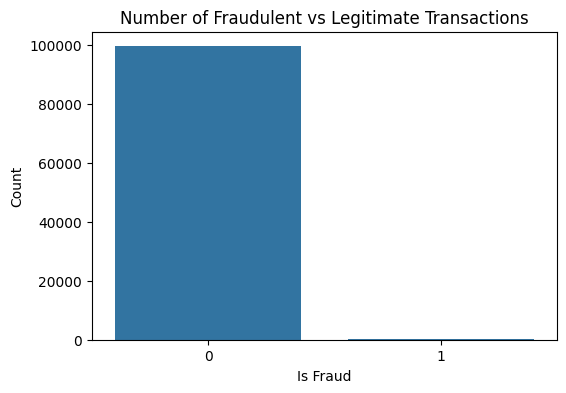

In [109]:
fraud_counts = df['is_fraud'].value_counts()
print(fraud_counts)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Number of Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

gender
F    54782
M    45217
Name: count, dtype: int64


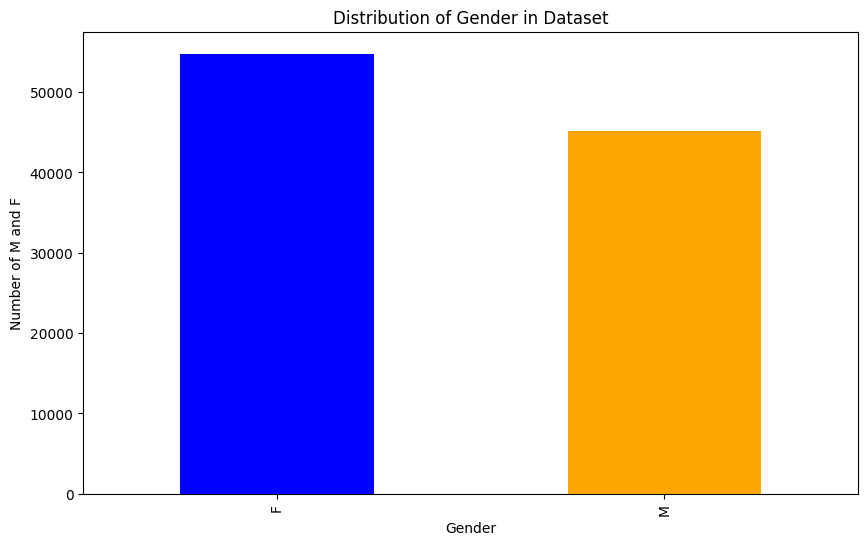

In [110]:
# Get the counts of each gender
gender_counts = df['gender'].value_counts()

# Display total counts of M and F
print(gender_counts)

# Plot the gender counts
gender_counts.plot(kind='bar', figsize=(10,6), color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of M and F')
plt.title('Distribution of Gender in Dataset')

# Show the plot
plt.show()


Data type of 'amt': object


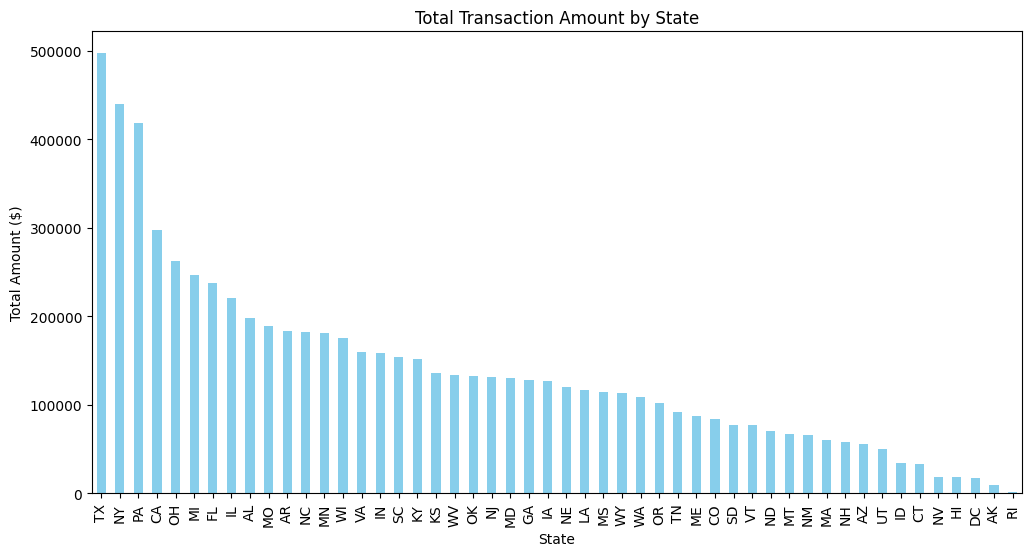

In [111]:
print("Data type of 'amt':", df['amt'].dtype)

# Ensure 'amt' is numeric
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Group by 'state' and sum the 'amt'
state_amt = df.groupby('state')['amt'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
state_amt.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Amount ($)')
plt.title('Total Transaction Amount by State')

# Show the plot
plt.show()

In [112]:
# Group by 'state' and sum the 'amt'
state_amt = df.groupby('state')['amt'].sum()

# Find the state with the maximum total amount
max_state = state_amt.idxmax()
max_amt = state_amt.max()

# Find the state with the minimum total amount
min_state = state_amt.idxmin()
min_amt = state_amt.min()

# Print the results
print(f"The state with the maximum total amount is {max_state} with ${max_amt:.2f}")
print(f"The state with the minimum total amount is {min_state} with ${min_amt:.2f}")


The state with the maximum total amount is TX with $496772.10
The state with the minimum total amount is RI with $1629.36


float64
Number of NaN values in 'amt': 0


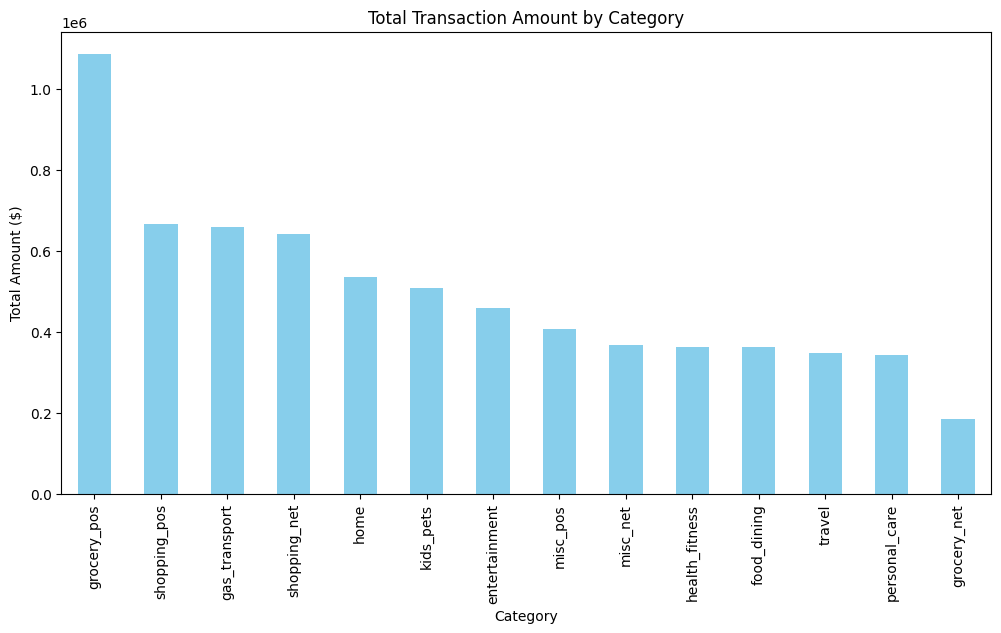

In [113]:
print(df['amt'].dtype)

# Convert 'amt' to numeric, setting errors to NaN
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Check for NaN values
print(f"Number of NaN values in 'amt': {df['amt'].isnull().sum()}")

# Group by 'category' and sum the 'amt'
state_amt = df.groupby('category')['amt'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
state_amt.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Total Amount ($)')
plt.title('Total Transaction Amount by Category')

# Show the plot
plt.show()

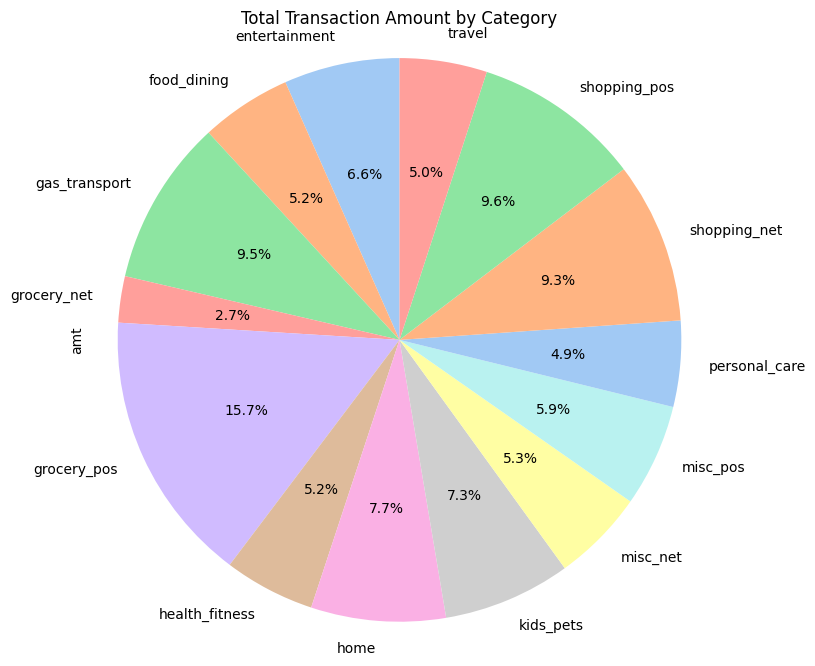

The category with the maximum total amount is grocery_pos with $1086766.76
The category with the minimum total amount is grocery_net with $184116.94


In [114]:
# Plot the pie chart for transaction amounts by category
category_amt = df.groupby('category')['amt'].sum()
plt.figure(figsize=(8,8))
category_amt.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Add title
plt.title('Total Transaction Amount by Category')

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the plot
plt.show()

# Get max and min category amounts
max_category = category_amt.idxmax()
max_amt = category_amt.max()
min_category = category_amt.idxmin()
min_amt = category_amt.min()

# Print max and min results for category
print(f"The category with the maximum total amount is {max_category} with ${max_amt:.2f}")
print(f"The category with the minimum total amount is {min_category} with ${min_amt:.2f}")

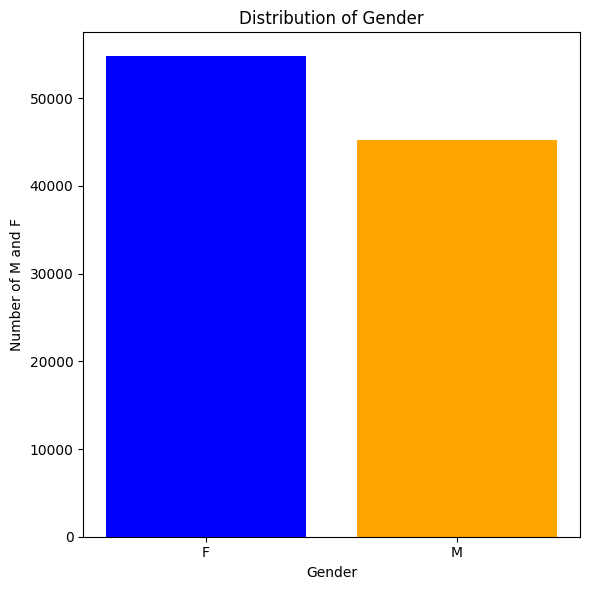

In [115]:
plt.figure(figsize=(6, 6))

# Plot the gender counts
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of M and F')
plt.title('Distribution of Gender')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

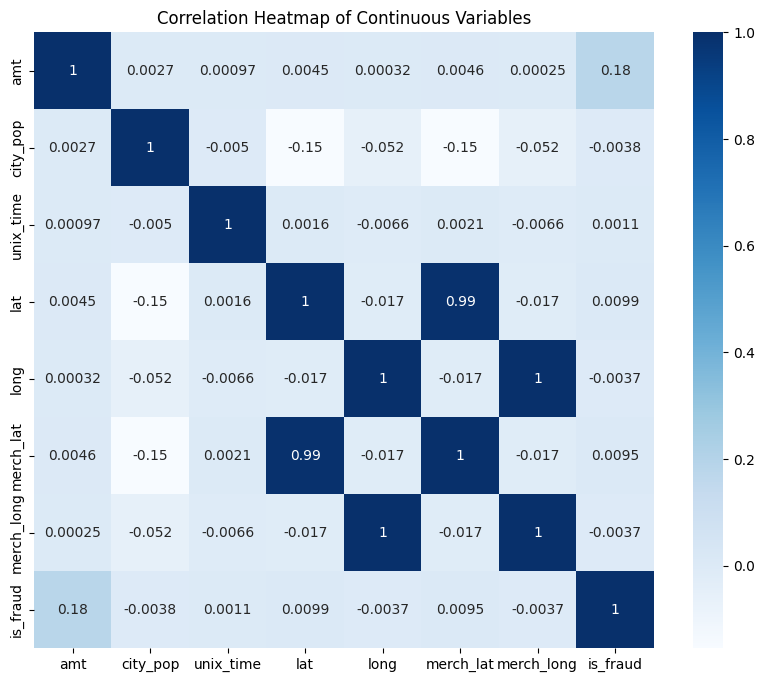

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['amt', 'city_pop', 'unix_time', 'lat', 'long', 'merch_lat', 'merch_long','is_fraud']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

In [117]:
df["merchant"].value_counts().sum()


99999

In [118]:
df["gender"].unique()

array(['M', 'F'], dtype=object)

In [119]:
df["is_fraud"].value_counts()

is_fraud
0    99597
1      402
Name: count, dtype: int64

In [120]:
df["category"].value_counts()

category
gas_transport     10338
grocery_pos        9404
home               9293
shopping_pos       8897
kids_pets          8758
shopping_net       7577
entertainment      7187
food_dining        7186
personal_care      7046
health_fitness     6639
misc_pos           6260
misc_net           4854
grocery_net        3421
travel             3139
Name: count, dtype: int64

In [121]:
df.columns

Index(['ID', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [122]:
df=df.drop(['trans_date_trans_time','cc_num',"merchant","category","first","last","gender","street","city","state","job","dob","trans_num"],axis=1)

In [123]:
x=df[['amt']]
y=df['is_fraud']

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [125]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [126]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
ŷ_train=lr.predict(x_train)
ŷ_test=lr.predict(x_test)
print("test_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("cross_validation",cross_val_score(lr,x_train,y_train,cv=5).mean())

test_accuracy 0.9955749446868086
test_accuracy 0.99615
cross_validation 0.9955999445277831


In [128]:
rfc = RandomForestClassifier(n_estimators=20, random_state=0)

rfc.fit(x_train, y_train)

train_accuracy = rfc.score(x_train, y_train)
test_accuracy = rfc.score(x_test, y_test)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

cross_val_accuracy = cross_val_score(rfc, x_train, y_train, cv=5).mean()
print(f'Cross Validation Accuracy: {cross_val_accuracy:.4f}')



Train Accuracy: 0.9985
Test Accuracy: 0.9957
Cross Validation Accuracy: 0.9945


In [127]:
dt=DecisionTreeClassifier(criterion="gini")
dt.fit(x_train,y_train)
ŷ_train=dt.predict(x_train)
ŷ_test=dt.predict(x_test)
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("cross_validation",cross_val_score(lr,x_train,y_train,cv=5).mean())

train_accuracy 0.9987374842185527
test_accuracy 0.99565
cross_validation 0.9955999445277831


In [129]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

train_accuracy = gnb.score(x_train, y_train)
test_accuracy = gnb.score(x_test, y_test)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

cross_val_accuracy = cross_val_score(gnb, x_train, y_train, cv=5).mean()
print(f'Cross Validation Accuracy: {cross_val_accuracy:.4f}')

Train Accuracy: 0.9921
Test Accuracy: 0.9926
Cross Validation Accuracy: 0.9919


In [130]:
import joblib

#joblib.dump(lr, 'LogisticRegression_model.pkl')

#joblib.dump(dt, 'DecisionTreeClassifier_model.pkl')

joblib.dump(rfc, 'random_forest_model.pkl')

#joblib.dump(gnb, 'GaussianNB_model.pkl')

['random_forest_model.pkl']